In [9]:
import sys
import os

if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !pip install -q gymnasium
    !pip install moviepy
    !apt install ffmpeg
    !pip install imageio[ffmpeg]
    !touch .setup_complete

# Note: You may not need to set up xvfb in Colab, as it typically handles displays well.

# If you face rendering issues with Gym, consider using the NoopResetEnv wrapper.
# Example:
# from gym.wrappers import NoopResetEnv
# env = NoopResetEnv(gym.make('YourEnvironmentName'))

# Now, you can proceed with your reinforcement learning experiments.


In [3]:
pip install gymnasium


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2


In [10]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
env=gym.make("CartPole-v1",render_mode="human")

if hasattr(env,'_max_episode_steps'):
    env=env.env
    
observation,info = env.reset()
for i in range(1000):
    action=env.action_space.sample()
    observation,reward,terminated,truncated,info=env.step(action)
    
    if terminated or truncated:
        observation,info=env.reset()
        
env.close()

# plt.imshow(env.render())

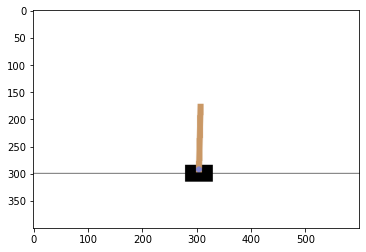

In [20]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

# gym compatibility: unwrap TimeLimit
if hasattr(env, '_max_episode_steps'):
    env = env.env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape

plt.imshow(env.render())

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
model=nn.sequential(nn.Conv2d(1,20,5),
                   nn.ReLU(),
                   nn.Conv2d(20,64,5),
                   nn.ReLU())

In [ ]:
def generate_session(env,t_max=1000):
    states,action,rewards=[],[],[]
    
    s=env.reset()[0]
    for t in range(t_max):
        action_probs=predict_probs(np.array([s]))[0]
        action = np.random.choice(len(action_probs), p=np.squeeze(action_probs))
        new_state,reward,terminated,truncated,info=env.step(action)
        states.append(s)
        actions.append(action)
        rewards.append(reward)
        
        s=new_state
        if terminated or truncated:
            break
        
        return states,actions,rewards

In [ ]:
states,actions,rewards=generate_session(env)